In [1]:
# Goal: Predict future daily temperature using an ARIMA model based on past weather data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# stimulate 2 years of daily temperature data (cyclical + noise)
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=730, freq='D')
temps = 20 + 10 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 2, 730)

df = pd.DataFrame({'date': dates, 'temp': temps})
df.set_index('date', inplace=True)
df.head()

,temp
date,
2020-01-01,21.165562
2020-01-02,20.067688
2020-01-03,21.811574
2020-01-04,23.734084
2020-01-05,20.391341


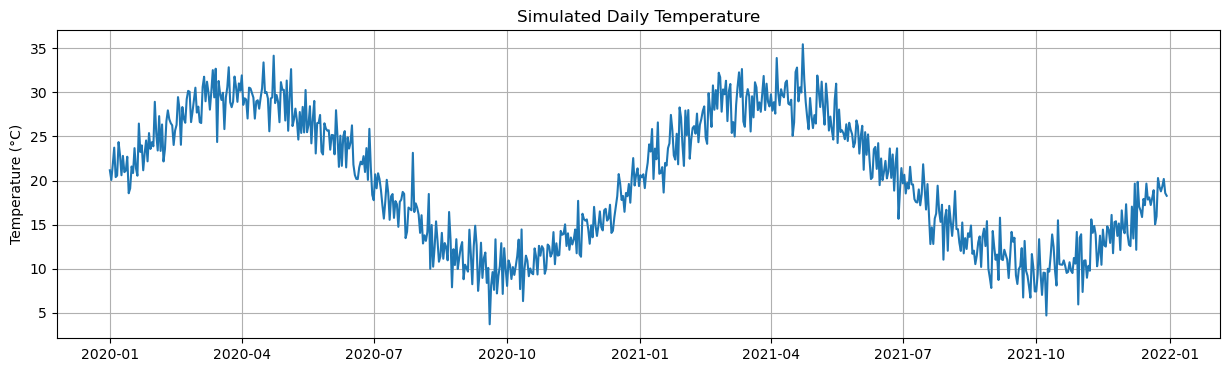

In [11]:
# visualize the temperature trend
plt.figure(figsize=(15,4))
plt.plot(df['temp'])
plt.title('Simulated Daily Temperature')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [12]:
# check for stationarity (ADF Test)
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['temp'])
print("ADF Statistic:", result[0])
print("p-value:", result[1]) # if p < 0.05, the series is stationary. if not, differencing will be applied automatically.

ADF Statistic: -1.549927129230294
p-value: 0.5086845957988166


In [13]:
# split inot train and test sets
# use last 30 days as test
train = df['temp'][:-30]
test = df['temp'][-30:]

In [15]:
# fit ARIMA Model with Auto-ARIMA
from pmdarima import auto_arima

# automatically determine optimal ARIMA model
model = auto_arima(train, seasonal=True, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3067.495, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3433.270, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3236.556, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3069.549, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3431.278, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3071.538, Time=1.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3069.473, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3069.494, Time=1.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3069.450, Time=0.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3069.400, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3067.440, Time=0.90 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3068.689, Time=0.50 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3069.387, Time=1.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3069.106, Time=0.48 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept

In [16]:
# view model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  700
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -1527.872
Date:                Tue, 27 Jan 2026   AIC                           3065.744
Time:                        14:16:29   BIC                           3088.492
Sample:                    01-01-2020   HQIC                          3074.538
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7662      0.166     -4.614      0.000      -1.092      -0.441
ma.L1         -0.0617      0.165     -0.375      0.708      -0.384       0.261
ma.L2         -0.6372      0.124     -5.154      0.0

In [17]:
# forecast future temperatures

In [18]:
# forecast the next 30 days
forecast = model.predict(n_periods=30)

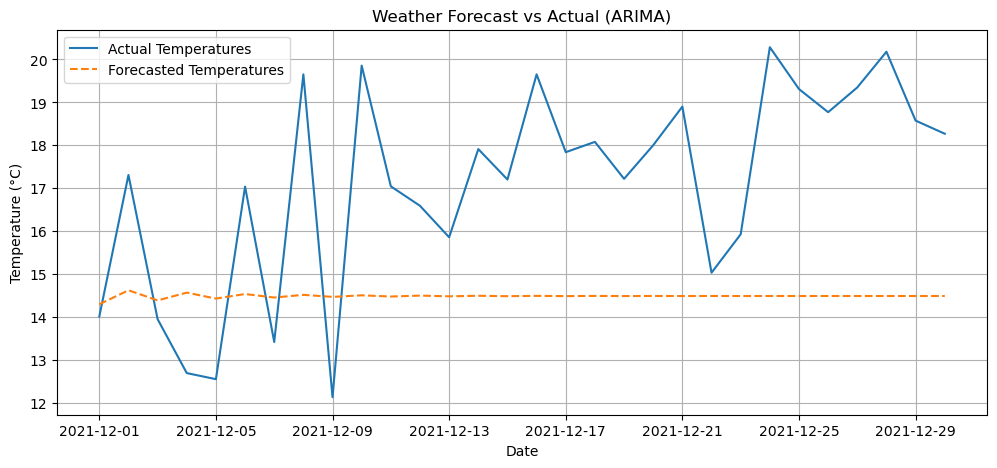

In [19]:
# plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(test.index, test.values, label="Actual Temperatures")
plt.plot(test.index, forecast, label="Forecasted Temperatures", linestyle="--")
plt.title("Weather Forecast vs Actual (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 12.27
Mean Absolute Error: 3.12
